In [1]:
!pip uninstall -y torch notebook notebook_shim tensorflow tensorflow-datasets prophet torchaudio torchdata torchtext torchvision

Found existing installation: torch 2.2.1+cu121
Uninstalling torch-2.2.1+cu121:
  Successfully uninstalled torch-2.2.1+cu121
Found existing installation: notebook 6.5.5
Uninstalling notebook-6.5.5:
  Successfully uninstalled notebook-6.5.5
Found existing installation: notebook_shim 0.2.4
Uninstalling notebook_shim-0.2.4:
  Successfully uninstalled notebook_shim-0.2.4
Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0
Found existing installation: tensorflow-datasets 4.9.4
Uninstalling tensorflow-datasets-4.9.4:
  Successfully uninstalled tensorflow-datasets-4.9.4
Found existing installation: prophet 1.1.5
Uninstalling prophet-1.1.5:
  Successfully uninstalled prophet-1.1.5
Found existing installation: torchaudio 2.2.1+cu121
Uninstalling torchaudio-2.2.1+cu121:
  Successfully uninstalled torchaudio-2.2.1+cu121
Found existing installation: torchdata 0.7.1
Uninstalling torchdata-0.7.1:
  Successfully uninstalled torchd

In [2]:
!pip install git+https://github.com/ourownstory/neural_prophet.git

  Cloning https://github.com/ourownstory/neural_prophet.git to /tmp/pip-req-build-kj56xf2u
  Running command git clone --filter=blob:none --quiet https://github.com/ourownstory/neural_prophet.git /tmp/pip-req-build-kj56xf2u
  Resolved https://github.com/ourownstory/neural_prophet.git to commit 23543560b4ed278e84d1fd0f119d332342336d0d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 914.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 3.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime

In [3]:
from neuralprophet import NeuralProphet

ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.
ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.


In [81]:
import pandas as pd

# Load the dataset for tutorial 4 with the extra temperature column
df = pd.read_csv("https://raw.githubusercontent.com/KhawajaAbdullah2000/CSV-files/main/CultusSale81.csv")
df.head()

,ds,y,dollar
0,2012-07-01,37,95
1,2012-07-02,37,95
2,2012-07-03,37,95
3,2012-07-04,37,95
4,2012-07-05,37,95


In [82]:
df.tail()

,ds,y,dollar
4013,2023-06-27,9,287
4014,2023-06-28,9,286
4015,2023-06-29,9,286
4016,2023-06-30,9,286
4017,2023-07-01,9,286


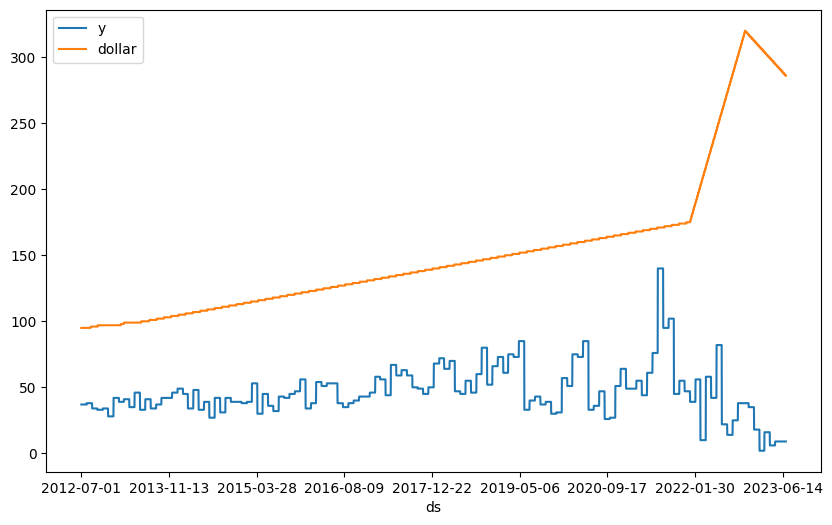

In [83]:
fig = df.plot(x="ds", y=["y", "dollar"], figsize=(10, 6))

In [84]:
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
set_log_level("ERROR")

# Model and prediction
m = NeuralProphet(
    n_changepoints=10,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    n_lags=30,  # Autogression
)
m.set_plotting_backend("plotly-static")

# Add dollar rate of last 30 days as lagged regressor
m.add_lagged_regressor("dollar", n_lags=40)

# Continue training the model and making a prediction
metrics = m.fit(df)
forecast = m.predict(df)

Finding best initial lr:   0%|          | 0/240 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 63it [00:00, ?it/s]

In [85]:
forecast.tail()

,ds,y,yhat1,ar1,lagged_regressor_dollar1,trend,season_yearly,season_weekly
4013,2023-06-27,9,9.122080,147.421051,0.298451,-110.636726,2.700536,-30.661230
4014,2023-06-28,9,8.819094,96.473495,-0.214831,-110.653053,2.647630,20.565853
4015,2023-06-29,9,8.762532,123.089798,-0.079101,-110.669373,2.602384,-6.181181
4016,2023-06-30,9,8.464307,126.255463,-0.288550,-110.685692,2.564528,-9.381446
4017,2023-07-01,9,8.481174,94.000000,-0.347313,-110.702019,2.532556,22.997948


In [86]:
future = m.make_future_dataframe(df, periods=5)

In [87]:
future.tail()

,ds,y,dollar
36,2023-06-28,9,286
37,2023-06-29,9,286
38,2023-06-30,9,286
39,2023-07-01,9,286
40,2023-07-02,None,None


In [73]:
# set plotting to focus on forecasting horizon 1 (the only one for us here)
m.highlight_nth_step_ahead_of_each_forecast(1)
m.plot(forecast)

Output hidden; open in https://colab.research.google.com to view.

In [75]:
forecast.tail()

,ds,y,yhat1,ar1,lagged_regressor_dollar1,trend,season_yearly,season_weekly
4012,2023-06-26,9,8.926516,-32.913383,-0.591587,45.444599,-3.010398,-0.002715
4013,2023-06-27,9,8.973806,-32.998684,-0.547513,45.436058,-2.933440,0.017384
4014,2023-06-28,9,9.018919,-33.125736,-0.530580,45.427509,-2.848104,0.095826
4015,2023-06-29,9,9.084387,-33.250793,-0.388233,45.418968,-2.755361,0.059804
4016,2023-06-30,9,9.062389,-33.323715,-0.335153,45.410423,-2.655864,-0.033301


In [88]:
forecast = m.predict(future)
forecast.tail()

Predicting: 63it [00:00, ?it/s]

,ds,y,yhat1,ar1,lagged_regressor_dollar1,trend,season_yearly,season_weekly
36,2023-06-28,9.0,NaN,NaN,NaN,NaN,NaN,NaN
37,2023-06-29,9.0,NaN,NaN,NaN,NaN,NaN,NaN
38,2023-06-30,9.0,NaN,NaN,NaN,NaN,NaN,NaN
39,2023-07-01,9.0,NaN,NaN,NaN,NaN,NaN,NaN
40,2023-07-02,NaN,8.650906,149.180923,-0.118967,-110.718338,2.505651,-32.198376


In [65]:
df = pd.read_csv("https://raw.githubusercontent.com/KhawajaAbdullah2000/CSV-files/main/CultusSale80.csv")

In [76]:
future = m.make_future_dataframe(df, periods=5)

In [77]:
future.tail()

,ds,y,dollar
26,2023-06-27,9,287
27,2023-06-28,9,286
28,2023-06-29,9,286
29,2023-06-30,9,286
30,2023-07-01,None,None


In [80]:
forecast = m.predict(future)
forecast.tail()

Predicting: 63it [00:00, ?it/s]

,ds,y,yhat1,ar1,lagged_regressor_dollar1,trend,season_yearly,season_weekly
26,2023-06-27,9.0,NaN,NaN,NaN,NaN,NaN,NaN
27,2023-06-28,9.0,NaN,NaN,NaN,NaN,NaN,NaN
28,2023-06-29,9.0,NaN,NaN,NaN,NaN,NaN,NaN
29,2023-06-30,9.0,NaN,NaN,NaN,NaN,NaN,NaN
30,2023-07-01,NaN,9.065485,-33.332661,-0.374755,45.401878,-2.550394,-0.078583


In [59]:
future = m.make_future_dataframe(df, periods=1)

In [60]:
future.tail()

,ds,y,dollar
26,2023-06-27,9,287
27,2023-06-28,9,286
28,2023-06-29,9,286
29,2023-06-30,9,286
30,2023-07-01,None,None


In [61]:
forecast = m.predict(future)
forecast.tail()

Predicting: 63it [00:00, ?it/s]

,ds,y,yhat1,ar1,lagged_regressor_dollar1,trend,season_yearly,season_weekly
26,2023-06-27,9.0,NaN,NaN,NaN,NaN,NaN,NaN
27,2023-06-28,9.0,NaN,NaN,NaN,NaN,NaN,NaN
28,2023-06-29,9.0,NaN,NaN,NaN,NaN,NaN,NaN
29,2023-06-30,9.0,NaN,NaN,NaN,NaN,NaN,NaN
30,2023-07-01,NaN,9.261322,-59.966625,-0.001994,73.858315,0.281339,-4.909709


In [37]:
future.tail()

,ds,y,dollar
26,2023-06-27,9,287
27,2023-06-28,9,286
28,2023-06-29,9,286
29,2023-06-30,9,286
30,2023-07-01,None,None


In [38]:
future = m.make_future_dataframe(df, periods=3)
future.tail()

,ds,y,dollar
26,2023-06-27,9,287
27,2023-06-28,9,286
28,2023-06-29,9,286
29,2023-06-30,9,286
30,2023-07-01,None,None


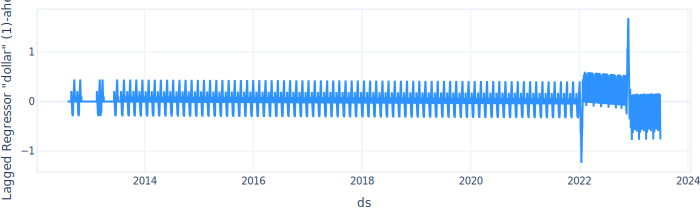

In [11]:
# show the component's forecast contribution
m.plot_components(forecast, components=["lagged_regressors"])

In [12]:
metrics.tail(1)

,MAE,RMSE,Loss,RegLoss,epoch
69,1.125019,2.818771,0.002288,0.0,69


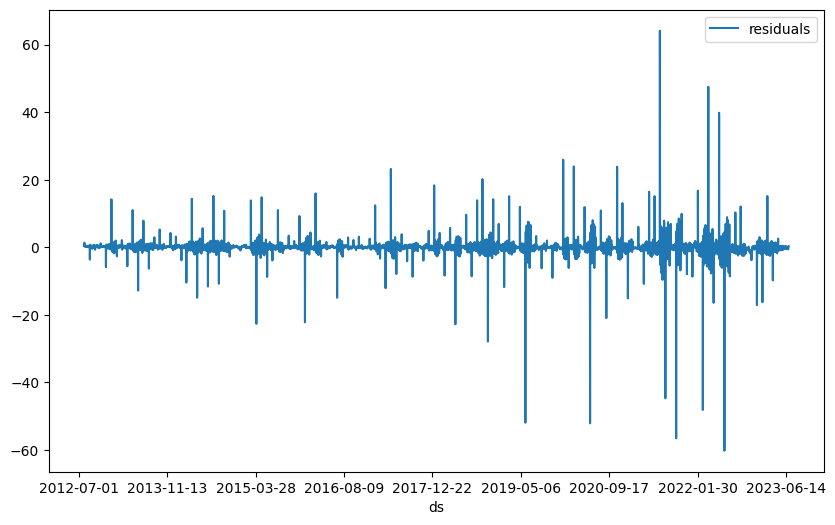

In [13]:
df_residuals = pd.DataFrame({"ds": df["ds"], "residuals": df["y"] - forecast["yhat1"]})
fig = df_residuals.plot(x="ds", y="residuals", figsize=(10, 6))

In [14]:
metrics

,MAE,RMSE,Loss,RegLoss,epoch
0,90.353714,111.384438,0.788899,0.0,0
1,38.808086,54.080421,0.282904,0.0,1
2,15.733021,21.541590,0.078512,0.0,2
3,7.691709,10.235157,0.021931,0.0,3
4,5.198209,7.562226,0.012647,0.0,4
...,...,...,...,...,...
65,1.140322,2.853808,0.002287,0.0,65
66,1.122221,2.768608,0.002261,0.0,66
67,1.121320,2.805243,0.002274,0.0,67
68,1.141889,2.798707,0.002266,0.0,68


Finding best initial lr:   0%|          | 0/240 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 63it [00:00, ?it/s]

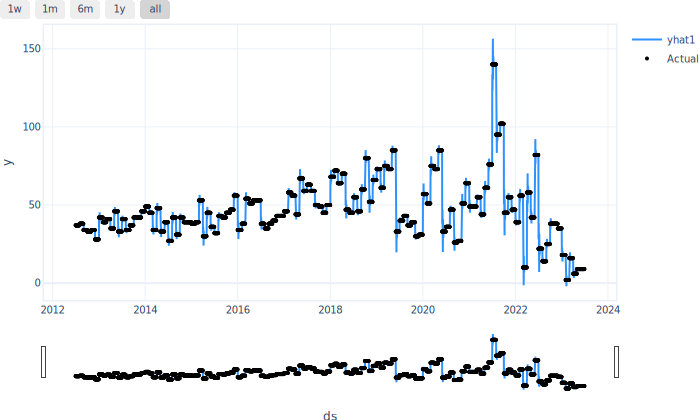

In [15]:
# Disable logging messages unless there is an error
set_log_level("ERROR")

# Model and prediction
m = NeuralProphet(
    n_changepoints=10,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    n_lags=10,
)
m.set_plotting_backend("plotly-static")

# Add the new future regressor
m.add_future_regressor("dollar")

# Continue training the model and making a prediction
metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

In [19]:
# Model and prediction
m = NeuralProphet(
    # Disable trend changepoints
    n_changepoints=10,
    # Disable seasonality components
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    n_lags=30,
    n_forecasts=10,
)
m.add_lagged_regressor("dollar")

m.set_plotting_backend("plotly-static")

metrics = m.fit(df)
forecast = m.predict(df)

Finding best initial lr:   0%|          | 0/240 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 63it [00:00, ?it/s]

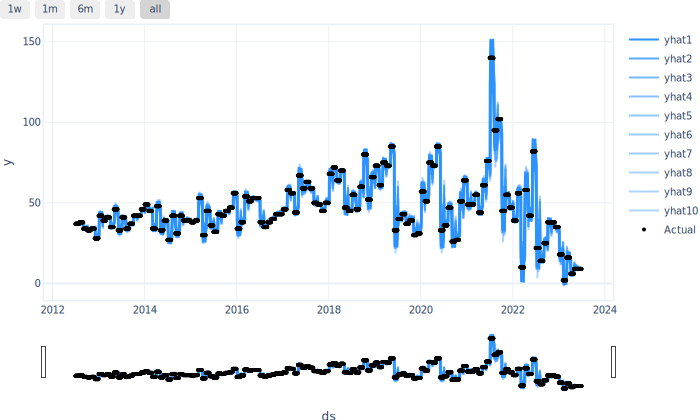

In [20]:
m.plot(forecast)

In [21]:
# Model and prediction
m = NeuralProphet(
    # Disable trend changepoints
    n_changepoints=10,
    # Disable seasonality components
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    n_lags=30,
    n_forecasts=30,
)
m.add_lagged_regressor("dollar")

m.set_plotting_backend("plotly-static")

metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

Output hidden; open in https://colab.research.google.com to view.

In [24]:
future = m.make_future_dataframe(df, periods=3)

In [25]:
future.tail()

,ds,y,dollar
55,2023-07-26,None,None
56,2023-07-27,None,None
57,2023-07-28,None,None
58,2023-07-29,None,None
59,2023-07-30,None,None


In [26]:
df.head()

,ds,y,dollar
0,2012-07-01,37,95
1,2012-07-02,37,95
2,2012-07-03,37,95
3,2012-07-04,37,95
4,2012-07-05,37,95
